In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv("./datasets/train_ss.csv", index_col=0)
df

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치,국적,영화구분,등급_12,등급_15,등급_전체,등급_청불,국내배급사,상장배급사,주요배급사,Label
0,1.586725,1.448563,1.388440,1.292488,1.264032,1.082707,1.083485,1.214976,0.220940,0.151663,1,1,0,1,0,0,0,1,1,1
1,2.044327,2.100502,2.047193,2.126718,2.095410,1.221115,1.219211,2.442399,0.364656,0.151663,1,1,0,1,0,0,1,0,1,0
2,-0.468564,-0.102452,-0.063658,-0.166565,-0.137170,-0.311679,-0.317315,0.742473,-0.066490,-0.267131,1,1,0,1,0,0,0,1,1,0
3,1.897895,0.193260,0.085788,0.020054,-0.044483,1.367220,1.506090,1.318166,-0.080862,-0.267131,1,1,0,0,0,1,0,1,1,1
4,-1.124896,-0.668091,-0.654381,-0.741673,-0.737006,-0.334519,-0.321334,-1.028057,-0.144096,-0.322970,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,-1.472674,-0.709023,-0.699262,-0.720307,-0.704361,-0.697955,-0.687346,-1.011764,-0.238948,0.067904,0,1,0,0,1,0,0,1,1,1
637,0.849331,0.391649,0.335180,0.729399,0.601574,0.223100,0.303294,1.182390,-0.167091,0.012065,0,1,1,0,0,0,1,0,1,1
638,-0.397962,-0.568001,-0.585947,-0.638799,-0.653512,-0.539432,-0.515868,-0.273138,-0.161342,-0.322970,1,1,0,0,0,1,0,1,1,1
639,0.195614,-0.491252,-0.507304,-0.404505,-0.416618,-0.474970,-0.459231,-0.169948,-0.238948,-0.322970,0,1,0,1,0,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전국스크린수   641 non-null    float64
 1   전국매출액    641 non-null    float64
 2   전국관객수    641 non-null    float64
 3   서울매출액    641 non-null    float64
 4   서울관객수    641 non-null    float64
 5   개봉일관객수   641 non-null    float64
 6   개봉일매출액   641 non-null    float64
 7   개봉일매출비율  641 non-null    float64
 8   배우가중치    641 non-null    float64
 9   감독가중치    641 non-null    float64
 10  국적       641 non-null    int64  
 11  영화구분     641 non-null    int64  
 12  등급_12    641 non-null    int64  
 13  등급_15    641 non-null    int64  
 14  등급_전체    641 non-null    int64  
 15  등급_청불    641 non-null    int64  
 16  국내배급사    641 non-null    int64  
 17  상장배급사    641 non-null    int64  
 18  주요배급사    641 non-null    int64  
 19  Label    641 non-null    int64  
dtypes: float64(10), int64(10)
memory usage: 105.2 KB


In [4]:
X_train = df.drop(columns='Label', axis=1)
y_train = df[['Label']]

## Embbeded Method

Lasso

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.5037


In [10]:
lasso_best = LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,전국스크린수,-0.030097
1,전국매출액,-0.568662
3,서울매출액,0.388934
4,서울관객수,0.139036
5,개봉일관객수,-0.431892
6,개봉일매출액,0.276510
7,개봉일매출비율,0.307447
8,배우가중치,0.006623
9,감독가중치,-0.058962
13,등급_15,0.097638


In [11]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 13 개


['전국스크린수',
 '전국매출액',
 '서울매출액',
 '서울관객수',
 '개봉일관객수',
 '개봉일매출액',
 '개봉일매출비율',
 '배우가중치',
 '감독가중치',
 '등급_15',
 '등급_청불',
 '국내배급사',
 '주요배급사']

In [22]:
df_lasso = X_train[['전국스크린수',
 '전국매출액',
 '개봉일관객수',
 '개봉일매출비율',
 '배우가중치',
 '감독가중치',
 '등급_15',
 '등급_청불',
 '국내배급사',
 '주요배급사']]

In [23]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_lasso)

,VIF Factor,features
0,4.524834,전국매출액
1,4.290374,배우가중치
2,4.086824,감독가중치
3,3.836881,전국스크린수
4,3.458787,개봉일매출비율
5,3.344683,개봉일관객수
6,2.945720,주요배급사
7,1.846425,국내배급사
8,1.715969,등급_15
9,1.269991,등급_청불


<AxesSubplot: >

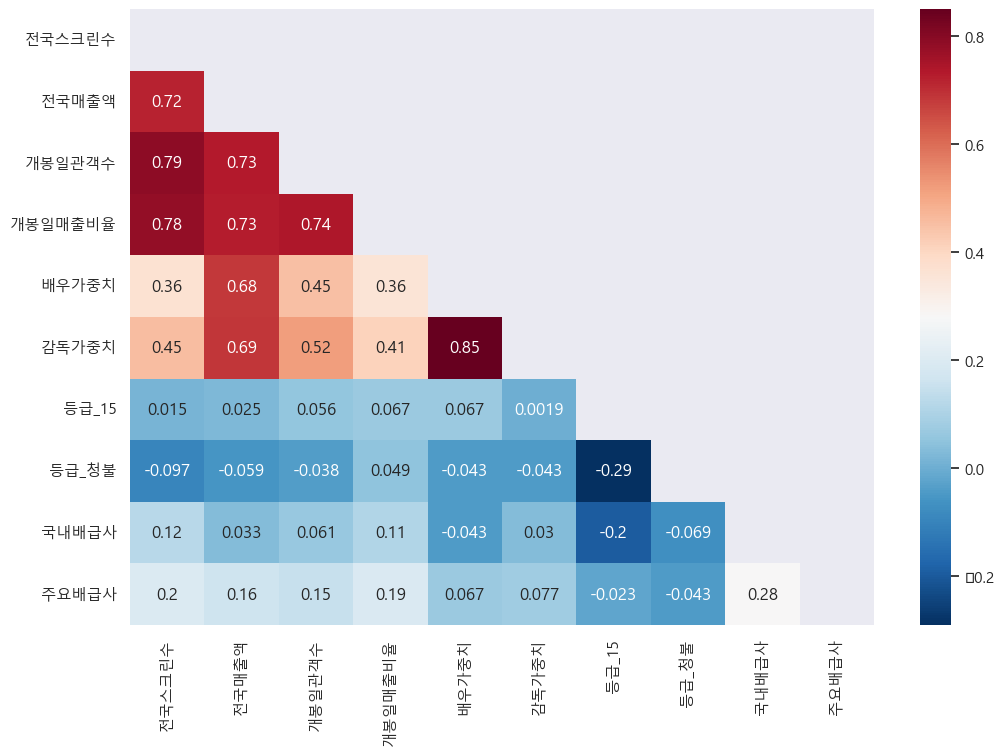

In [24]:
df_fs = df_lasso
df_fs_cor = df_fs.corr(method='pearson')

sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_fs_cor, xticklabels=df_fs_cor.columns, yticklabels=df_fs_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_fs_cor))

## 최종 Feature
* 10개
* '전국스크린수','전국매출액','개봉일관객수','개봉일매출비율','배우가중치','감독가중치','등급_15','등급_청불','국내배급사','주요배급사'